<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы-исследования" data-toc-modified-id="Выводы-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы исследования</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Цель проекта:

Спрогнозировать, уйдёт клиент из банка в ближайшее время или нет на основе предоставленных исторических данных о поведении клиентов и расторжении договоров с банком.

# Задачи:

1. Построить модель с предельно большим значением F1-меры, довести метрику до 0.59. 
2. Проверить F1-меру на тестовой выборке.
3. Дополнительно измерить AUC-ROC, сравнить её значение с F1-мерой.

## Подготовка данных

In [1]:
# Импортируем необходимые библиотеки:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve 
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyClassifier

In [2]:
#Загрузим данные:

data = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Изучим общую инфомацию

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# Проверим дубликаты 

data.duplicated().sum()

np.int64(0)

In [6]:
# Проверим пропуски

data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
missing_values = data.isna().sum()
total_values = data.shape[0]
missing_persantage = (missing_values / total_values) * 100
missing_persantage

RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

**Выводы по обзору данных:**

Датасет состоит из 10000 записей (строк) и 14 признаков (столбцов).

Среди признаков есть категориальные (Geography, Gender) и бинарные (HasCrCard, IsActiveMember, Exited).

Также на данном этапе можно отметить, что признаки RowNumber, CustomerId и Surname не будут влиять на процесс прогнозирования, поэтому можно их удалить.

ValueError: could not convert string to float: 'Hargrave'

In [9]:
# Поскольку данные столбца особо не коррелируют с остальными, заполним пропущенные значения, например, медианой

median_value = data['Tenure'].median()
data['Tenure'].fillna(median_value, inplace=True)

/tmp/ipykernel_2143/2125147102.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tenure'].fillna(median_value, inplace=True)


In [10]:
# Проверка на пропуски после заполнения медианой

data['Tenure'].isna().sum()

np.int64(0)

In [11]:
# Удалим ненужные столбцы

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [14]:
import re

data.columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
        'HasCrCard', 'IsActiveMember', 'EstimatedSalar', 'Exited']
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in data.columns]
print(data.columns)  # camel_case_name

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salar',
       'exited'],
      dtype='object')


In [15]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salar   10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [16]:
# Проверим количество уникальных значений в колонках gender и geography
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [17]:
data['geography'].value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

**Выводы по предобработке данных** 

Привели название столбцов к единому стилю

Удалили ненужные столбцы

## Исследование задачи

In [18]:
# Сохраним обучающие признаки в переменной features, целевой признак в переменной target и объявим их:

features = data.drop('exited', axis = 1)
target = data['exited']

Разделим весь набор данных один раз для выделения обучающей выборки - 70% для обучения и временно назначим остаток для тестирования. Затем еще раз, чтобы разбить оставшиеся данные поровну на датасеты для тестирования и валидации. Для пропорциональности классов при разделении на обучающий и проверяющий датасеты будем использовать параметр stratify функции train_test_split. 

In [19]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size=0.7, random_state=12345, stratify=target)

In [20]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, train_size=0.5, random_state=12345, stratify=target_test)

In [21]:
# Проверим корректность разбиения

display(
    features_train.shape, 
    target_train.shape, 
    features_test.shape, 
    target_test.shape,
    features_valid.shape, 
    target_valid.shape)

(7000, 10)

(7000,)

(1500, 10)

(1500,)

(1500, 10)

(1500,)

Оценим баланс целевого признака, т.е. отток клиентов:

In [22]:
display(data['exited'].value_counts(normalize=True))

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Вывод:

классы несбалансированы, примерно в 80% случаев клиенты не уходят из банка.
Визуализируем распределение:

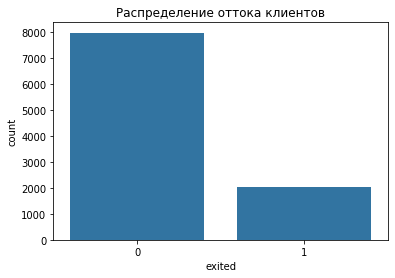

In [23]:
sns.countplot(x='exited', data=data)
plt.title('Распределение оттока клиентов')
plt.show()
plt.show()

Вывод:

график также демонстрирует дисбаланс классов.

Используя технику OneHotEncoder закодируем категориальные переменные 'gender' и 'geography'

In [24]:
# encoder = OneHotEncoder(sparse=False, drop='first')
columns_to_encode = ['gender', 'geography']



encoder = OneHotEncoder(sparse_output = False, drop='first')
encoder.fit(features_train[columns_to_encode])


# Преобразуем категориальные столбцы обучающей выборки
# Метод .get_feature_names_out() позволяет получить названия столбцов, 
# которые получаться на выходе после енкодера
features_train[encoder.get_feature_names_out()] = encoder.transform(features_train[columns_to_encode])


# Преобразовываем тестовую и валидационную выборки
features_test[encoder.get_feature_names_out()] = encoder.transform(features_test[columns_to_encode])
features_valid[encoder.get_feature_names_out()] = encoder.transform(features_valid[columns_to_encode])

# Далее удаляем исходные столбцы, поскольу они больше нам не нужны
features_train = features_train.drop(columns_to_encode, axis=1)
features_test = features_test.drop(columns_to_encode, axis=1)
features_valid = features_valid.drop(columns_to_encode, axis=1)



In [25]:

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(7000, 11)
(1500, 11)
(1500, 11)
(7000,)
(1500,)
(1500,)


Обучим модели на обучающей выборке без учета дисбаланса классов и проверим её на валидационной выборке.

In [26]:
def roc_graph(target_valid, probabilities_one_valid):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange") 
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая") 
    plt.grid()
    plt.show()

F1 для дерева решений = 0.6213592233009708
при глубине дерева = 6
AUC-ROC = 0.8580670827903147


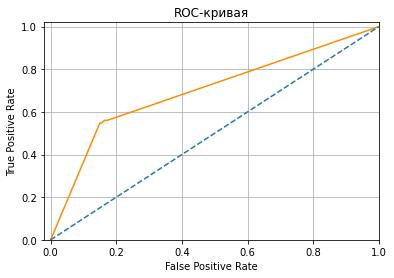

In [27]:
# Дерево решений 

best_model = None
best_f1_model = 0
best_depth = 0
best_auc_roc = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 
    result_f1 = f1_score(target_valid, predictions) 
    result_auc_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    if result_f1 > best_f1_model:
        best_f1_model = result_f1
        best_depth = depth
        best_auc_roc = result_auc_roc
        best_model = model # сохраним лучшую модель
print('F1 для дерева решений =', best_f1_model)
print('при глубине дерева =', best_depth)
print('AUC-ROC =', best_auc_roc)

roc_graph(target_valid,  model.predict_proba(features_valid)[:,1])

F1 для случайного леса = 0.6134301270417423
Максимальная глубина = 18
Число деревьев = 7
AUC-ROC = 0.8265628643939915


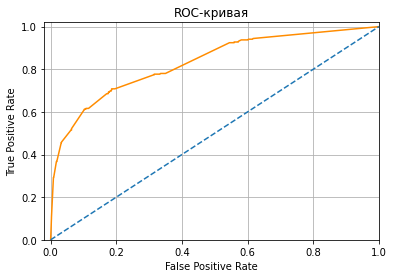

CPU times: user 7.67 s, sys: 28 ms, total: 7.7 s
Wall time: 7.86 s


In [28]:
%%time 

# Случайный лес

best_model_rf = None
best_f1_rf = 0
best_depth_rf = 0
best_est_rf = 0
best_roc_auc_score_rf = 0
for depth in range(1, 20):
    for est in range(1, 10):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, model_rf.predict_proba(features_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            best_model_rf = model_rf
print('F1 для случайного леса =', best_f1_rf)
print('Максимальная глубина =', best_depth_rf)
print('Число деревьев =', best_est_rf)
print('AUC-ROC =', best_roc_auc_score_rf)


roc_graph(target_valid,  model_rf.predict_proba(features_valid)[:,1])

In [29]:
# Создадим объект StandardScaler

scaler = StandardScaler()

# Масштабируем признаки обучающей выборки

features_train_scaled = scaler.fit_transform(features_train)

# Применяем трансформацию к валидационной выборке

features_valid_scaled = scaler.transform(features_valid)

# Инициализируем модель логистической регрессии и обучаем ее

lr = LogisticRegression()
lr.fit(features_train_scaled, target_train)

# Оценим модель на валидационной выборке
pred_val_lr = lr.predict(features_valid_scaled)
print('F1 для логистической регрессии =', f1_score(target_valid, pred_val_lr))
print('AUC-ROC для логистической регрессии =', roc_auc_score(target_valid, 
                                                             lr.predict_proba(features_valid_scaled)[:, 1]))



F1 для логистической регрессии = 0.35096153846153844
AUC-ROC для логистической регрессии = 0.7760065848137733


**Выводы по исследованию задачи:**

Без учёта дисбаланса наибольшее значение F1-меры наблюдается в моделях дерева решений и случайного леса - 0.573 и 0.578 соответственно. Поскольку значения почти одинаковые проверим обе модели с учетом дисбаланса классов.

## Борьба с дисбалансом

In [30]:
! pip install imblearn

     |████████████████████████████████| 258 kB 2.2 MB/s eta 0:00:01


In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

features_train_res, target_train_res = rus.fit_resample(features_train, target_train)

print(features_train_res.shape)
print(target_train_res.mean())

(2852, 11)
0.5


In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# После импорта библиотеки может появиться ошибка, тогда просто перезапусти ядро jupyter-ноутбука и ошибка должна исчезнуть :)

sm = SMOTE(random_state=42)

features_train_up, target_train_up = sm.fit_resample(features_train, target_train)
# features_valid_up, target_valid_up = sm.fit_resample(features_valid, target_valid)

print("Новая размерность увеличенной обучающей выборки: ", features_train_up.shape)
# print('Новая размерность увеличенной валидационной выборки:', features_valid_up.shape)
print(target_train_up.mean())
# print(target_valid_up.mean())

# Аналогично для уменьшения выборки

rus = RandomUnderSampler(random_state=42)

features_train_down, target_train_down = rus.fit_resample(features_train, target_train)
# features_valid_down, target_valid_down = rus.fit_resample(features_valid, target_valid)
print("Новая размерность уменьшенной обучающей выборки: ", features_train_down.shape)
# print('Новая размерномть уменьшенной валидационной выборки:', features_valid_down.shape)
print(target_train_down.mean())
# print(target_valid_down.mean())

Новая размерность увеличенной обучающей выборки:  (11148, 11)
0.5
Новая размерность уменьшенной обучающей выборки:  (2852, 11)
0.5


F1 для дерева решений = 0.6246153846153846
при глубине дерева = 7
AUC-ROC = 0.8395939364839837


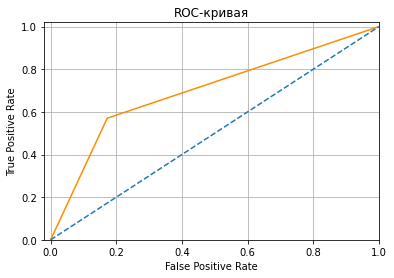

In [33]:
# Дерево решений на увеличенной выборке

best_model_up = None
best_f1_model_up = 0
best_depth_up = 0
best_auc_roc_up = 0
for depth in range(1, 30):
    model_up = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model_up.fit(features_train_up, target_train_up) 
    pred_up = model_up.predict(features_valid) 
    result_f1_up = f1_score(target_valid, pred_up) 
    result_auc_roc_up = roc_auc_score(target_valid, model_up.predict_proba(features_valid)[:, 1])
    if result_f1_up > best_f1_model_up:
        best_f1_model_up = result_f1_up
        best_depth_up = depth
        best_auc_roc_up = result_auc_roc_up
        best_model_up = model_up # сохраним лучшую модель
print('F1 для дерева решений =', best_f1_model_up)
print('при глубине дерева =', best_depth_up)
print('AUC-ROC =', best_auc_roc_up)

roc_graph(target_valid,  model_up.predict_proba(features_valid)[:,1])

F1 для дерева решений на уменьшенной выборке = 0.5846153846153846
при глубине дерева = 8
AUC-ROC = 0.8166170519240004


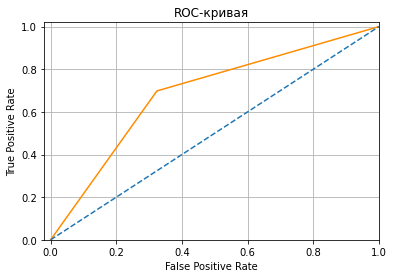

In [34]:
# Дерево решений на уменьшенной выборке

best_model_down = None
best_f1_model_down = 0
best_depth_down = 0
best_auc_roc_down = 0
for depth in range(1, 30):
    model_down = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model_down.fit(features_train_down, target_train_down) 
    pred_down = model_down.predict(features_valid) 
    result_f1_down = f1_score(target_valid, pred_down) 
    result_auc_roc_down = roc_auc_score(target_valid, model_down.predict_proba(features_valid)[:, 1])
    if result_f1_down > best_f1_model_down:
        best_f1_model_down = result_f1_down
        best_depth_down = depth
        best_auc_roc_down = result_auc_roc_down
        best_model_down = model_down # сохраним лучшую модель
print('F1 для дерева решений на уменьшенной выборке =', best_f1_model_down)
print('при глубине дерева =', best_depth_down)
print('AUC-ROC =', best_auc_roc_down)

roc_graph(target_valid,  model_down.predict_proba(features_valid)[:,1])

F1 для дерева решений взвешивание классов = 0.5846994535519126
при глубине дерева = 10
AUC-ROC = 0.6872556416763839


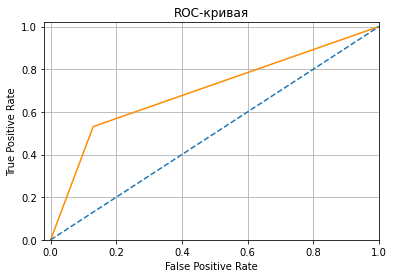

In [35]:
# Дерево решений взвешивание классов

best_model_clw = None
best_f1_model_clw = 0
best_depth_clw = 0
best_auc_roc_clw = 0
for depth in range(1, 30):
    model_clw = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight = 'balanced') 
    model_clw.fit(features_train, target_train) 
    pred_clw = model_clw.predict(features_valid) 
    result_f1_clw = f1_score(target_valid, pred_clw) 
    result_auc_roc_clw = roc_auc_score(target_valid, model_clw.predict_proba(features_valid)[:, 1])
    if result_f1_clw > best_f1_model_clw:
        best_f1_model_clw = result_f1_clw
        best_depth_clw = depth
        best_auc_roc_clw = result_auc_roc_down
        best_model_clw = model_clw # сохраним лучшую модель
print('F1 для дерева решений взвешивание классов =', best_f1_model_clw)
print('при глубине дерева =', best_depth_clw)
print('AUC-ROC =', best_auc_roc_clw)

roc_graph(target_valid,  model_clw.predict_proba(features_valid)[:,1])

F1 для случайного леса на увеличенной выборке = 0.6366559485530546
Максимальная глубина = 9
Число деревьев = 9
AUC-ROC = 0.8586158172714178


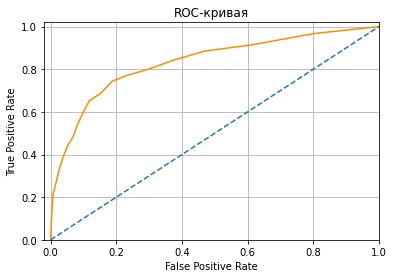

CPU times: user 1min 10s, sys: 428 ms, total: 1min 11s
Wall time: 1min 12s


In [36]:
%%time 

# Случайный лес на увеличенной выборке

best_model_rf_up = None
best_f1_rf_up = 0
best_depth_rf_up = 0
best_est_rf_up = 0
best_roc_auc_score_rf_up = 0
for depth in range(1, 30):
    for est in range(1, 20):
        model_rf_up = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_up.fit(features_train_up, target_train_up)
        pred_val_rf_up = model_rf_up.predict(features_valid)
        f1_rf_up = f1_score(target_valid, pred_val_rf_up)
        roc_auc_score_rf_up = roc_auc_score(target_valid, model_rf_up.predict_proba(features_valid)[:,1])
        if f1_rf_up > best_f1_rf_up:
            best_f1_rf_up = f1_rf_up
            best_depth_rf_up = depth
            best_est_rf_up = est
            best_roc_auc_score_rf_up = roc_auc_score_rf_up
            best_model_rf_up = model_rf_up
print('F1 для случайного леса на увеличенной выборке =', best_f1_rf_up)
print('Максимальная глубина =', best_depth_rf_up)
print('Число деревьев =', best_est_rf_up)
print('AUC-ROC =', best_roc_auc_score_rf_up)

roc_graph(target_valid,  model_rf_up.predict_proba(features_valid)[:,1])

F1 для случайного леса на уменьшенной выборке = 0.6151930261519303
Максимальная глубина = 8
Число деревьев = 19
AUC-ROC = 0.8677385280197545


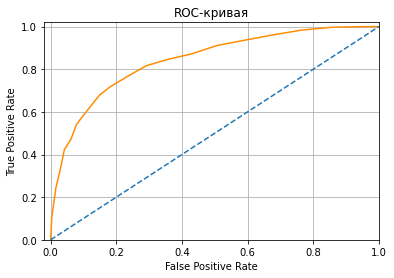

CPU times: user 26.8 s, sys: 92 ms, total: 26.9 s
Wall time: 27.5 s


In [37]:
%%time 

# Случайный лес на уменьшенной выборке

best_model_rа_down = None
best_f1_rf_down = 0
best_depth_rf_down = 0
best_est_rf_down = 0
best_roc_auc_score_rf_down = 0
for depth in range(1, 30):
    for est in range(1, 20):
        model_rf_down = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_down.fit(features_train_down, target_train_down)
        pred_val_rf_down = model_rf_down.predict(features_valid)
        f1_rf_down = f1_score(target_valid, pred_val_rf_down)
        roc_auc_score_rf_down = roc_auc_score(target_valid, model_rf_down.predict_proba(features_valid)[:,1])
        if f1_rf_down > best_f1_rf_down:
            best_f1_rf_down = f1_rf_down
            best_depth_rf_down = depth
            best_est_rf_down = est
            best_roc_auc_score_rf_down = roc_auc_score_rf_down
            best_model_rf_down = model_rf_down
print('F1 для случайного леса на уменьшенной выборке =', best_f1_rf_down)
print('Максимальная глубина =', best_depth_rf_down)
print('Число деревьев =', best_est_rf_down)
print('AUC-ROC =', best_roc_auc_score_rf_down)

roc_graph(target_valid,  model_rf_down.predict_proba(features_valid)[:,1])

F1 для случайного леса взвешивание классов = 0.637593984962406
Максимальная глубина = 9
Число деревьев = 17
AUC-ROC = 0.8601824542149668


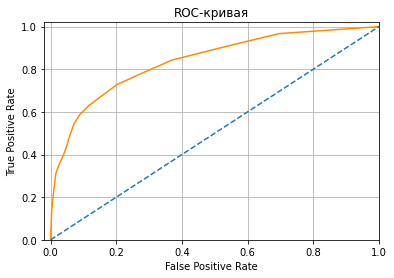

CPU times: user 47.5 s, sys: 84 ms, total: 47.5 s
Wall time: 48.5 s


In [38]:
%%time 

# Случайный лес взвешивание классов

best_model_rа_clw = None
best_f1_rf_clw = 0
best_depth_rf_clw = 0
best_est_rf_clw = 0
best_roc_auc_score_rf_clw = 0
for depth in range(1, 30):
    for est in range(1, 20):
        model_rf_clw = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_rf_clw.fit(features_train, target_train)
        pred_val_rf_clw = model_rf_clw.predict(features_valid)
        f1_rf_clw = f1_score(target_valid, pred_val_rf_clw)
        roc_auc_score_rf_clw = roc_auc_score(target_valid, model_rf_clw.predict_proba(features_valid)[:,1])
        if f1_rf_clw > best_f1_rf_clw:
            best_f1_rf_clw = f1_rf_clw
            best_depth_rf_clw = depth
            best_est_rf_clw = est
            best_roc_auc_score_rf_clw = roc_auc_score_rf_clw
            best_model_rf_clw = model_rf_clw
print('F1 для случайного леса взвешивание классов =', best_f1_rf_clw)
print('Максимальная глубина =', best_depth_rf_clw)
print('Число деревьев =', best_est_rf_clw)
print('AUC-ROC =', best_roc_auc_score_rf_clw)

roc_graph(target_valid,  model_rf_clw.predict_proba(features_valid)[:,1])

**Выводы по борьбе с дисбалансом:**

Наибольшее значение F1-меры получили на для модели случайного леса, обученной на увеличенной выборке.

## Тестирование модели

F1 = 0.5984251968503937
AUC-ROC = 0.8600710524299054
Точность лучшей модели = 0.83


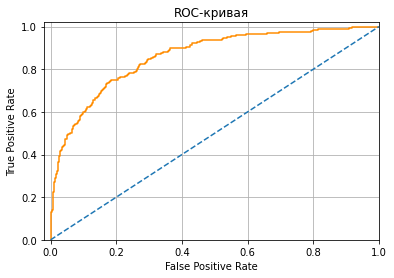

In [39]:
# Тестирование лучшей модели случайного леса при взвещивании классов


predictions_test = best_model_rf_clw.predict(features_test) # для предсказаний берём лучшую модель
print('F1 =', f1_score(target_test, predictions_test))
print('AUC-ROC =', roc_auc_score(target_test, best_model_rf_clw.predict_proba(features_test)[:,1]));
print('Точность лучшей модели =', best_model_rf_clw.score(features_test, target_test))

roc_graph(target_test, best_model_rf_clw.predict_proba(features_test)[:,1])

Проведем проверку модели на адекватность с помощью DummyClassifier(), данная модель будет всегда выдавать самое часто встречающееся значение в целевом признаке вне зависимости от того какие данные ей подаются на вход.  
Сравним нашу лучшую модель с данной константной моделью.

In [40]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_test, target_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(features_test)
print('Точность константной модели =', dummy_clf.score(features_test, target_test))

Точность константной модели = 0.796


## Выводы исследования

Для прогнозирования оттока клиентов из "Бета-Банка" построили модель с предельно большим значением F1-меры на основе исторических данных поведении клиентов и расторжении договоров с банком. Для этого исследовали данные на дисбаланс и применили различные методы борьбы с дисбалансом классов - увеличение, уменьшение выборок, а также взвешивание классов.


Были рассмотрены модели дерева решений и случайного леса.

У модели случайного леса при взвешивании классов показатель F1 вырос до 64%, AUC-ROC = 86%, при этом результаты после увеличения числа наблюдений положительного класса дали похожие значения с небольшим уменьшением в третьем знаке после запятой.

Следовательно наилучшей моделью считается случайный лес при взвешивании классов.

Проверка модели на тестовой выборке подтвердила, что взвешивание классов помогло справиться с дисбалансом классов, достигая F1 59,84 %, AUC-ROC 86%.

Поскольку F1 - среднее гармоническое полноты и точности (растет только вместе с полнотой и точностью), то увеличение F1 свидетельствует об изменении в алгоритме в лучшую сторону. То есть вероятность того, что клиент останется больше, чем вероятность того, что клиеент уйдет.

Модель была также проверена на вменяемость с результатом точности предсказания = 0.83 против 0.796. Результат говорит о том, что модель работает адекватно и способна предсказать лучше, чем случайная.